In [518]:
import community as community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import numpy as np
import random
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep
import matplotlib.pyplot as plt
import pprint

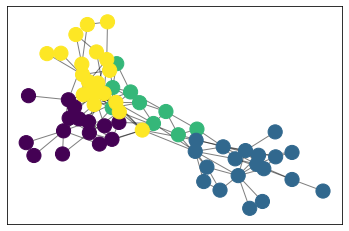

In [519]:
G=nx.Graph()
# gr=pd.read_csv('karate.csv')
gr=pd.read_csv('dolphin.csv')
#gr=pd.read_csv('football.csv')
edge=[(gr['Source'][i],gr['Destination'][i]) for i in range(0,len(gr['Source']))]
G.add_edges_from(edge)
node=max([max(x[0],x[1]) for x in edge])
# compute the best partition
# partition contains color of each node
partition = community_louvain.best_partition(G)

# visualization of clusters
pos = nx.spring_layout(G)
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=200,cmap=cmap, node_color=list(partition.values()),)
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

In [520]:
# Generating gateEdges
# gateEdges contains edges--> [(a,b),(b,c)]
gateEdges=[]
for x in edge:
    if(partition[x[0]]!=partition[x[1]]):
        gateEdges.append(x)

# Generating gate nodes 
gateNodesDict={}

for tup in gateEdges:
    gateNodesDict[tup[0]]=1
    gateNodesDict[tup[1]]=1

gateNodesList=list(gateNodesDict.keys())

print("Gateway graph nodes:",gateNodesList)
for x in gateNodesList:
    for y in gateNodesList:
        if(x==y or ((x,y) in gateEdges) or ((y,x) in gateEdges)):
            continue
        else:
            if(partition[x]==partition[y]):
                if((x,y) in edge or (y,x) in edge):
                    gateEdges.append((x,y))
gatewayGraph=nx.Graph()
gatewayGraph.add_edges_from(gateEdges)

Gateway graph nodes: [14, 0, 3, 15, 19, 1, 20, 8, 18, 24, 27, 7, 28, 29, 10, 33, 21, 36, 23, 37, 39, 40, 43, 44, 2, 45, 47, 50, 42, 51, 52, 54, 59, 61]


In [521]:
# Gate graph
# This is the gate way graph
# gate
tot_g=[]
for i in range(0,500):
    g = gatewayGraph
    attr = {(u, v): {"weight": round(random.uniform(0,1),2)} for (u, v) in gatewayGraph.edges()}
    nx.set_edge_attributes(g, attr)
    tot_g.append(g)

for k in range(0,500):
    print(len(tot_g[k]))
    tot_g[k].add_nodes_from(gateNodesList)
    print(len(tot_g[k]))
    for i in range(0,len(gateEdges)):
        tot_g[k].add_edge(gateEdges[i][0],gateEdges[i][1],weight=round(random.uniform(0,1),2))
    break

34
34


In [522]:
#BCS Score
def BCS(gg,nodes):
    BCS_={}
    for node in gateNodesList:
        BCS_[node]=0
    for i in gg:
        x=(nx.betweenness_centrality(i,weight='weight'))
        for j in x:
            BCS_[j]+=(1/500)*x[j]
    return BCS_
BCS_value=BCS(tot_g,len(gateNodesList))
BCS_value=(sorted(BCS_value.items(), key=lambda x: x[1],reverse=True))
print(BCS_value)

[(45, 0.6428345959595959), (29, 0.5492424242424243), (10, 0.33333333333333265), (2, 0.3030303030303044), (40, 0.21291035353535148), (18, 0.17361111111111058), (15, 0.16461489898989953), (7, 0.15561868686868738), (36, 0.14109848484848578), (8, 0.0934343434343445), (42, 0.09185606060606119), (23, 0.07670454545454593), (24, 0.07173295454545454), (20, 0.06060606060606029), (47, 0.05965909090909028), (28, 0.04371843434343436), (50, 0.02556818181818203), (33, 0.02083333333333329), (1, 0.01294191919191925), (3, 0.009469696969697013), (54, 0.009469696969697013), (14, 0.0056818181818181915), (37, 0.003787878787878768), (43, 0.003787878787878768), (59, 0.003787878787878768), (0, 0.0), (19, 0.0), (27, 0.0), (21, 0.0), (39, 0.0), (44, 0.0), (51, 0.0), (52, 0.0), (61, 0.0)]


In [523]:
# Model selection - diffusion time
model = ep.SIModel(G)

# Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.03)
cfg.add_model_parameter("fraction_infected", 1/max([max(x[0],x[1]) for x in edge]))
model.set_initial_status(cfg)

# Simulation execution
iterations = model.iteration_bunch(200)

#Mapping diffusion_time_to_each_node
time_of_diffusion={}
for i in range(1,node+1):
    time_of_diffusion[i]=-1
for i in iterations:
    for j in i['status']:
        if(i['status'][j]==1):
            time_of_diffusion[j]=i['iteration']

100%|██████████| 200/200 [00:00<00:00, 2127.58it/s]


In [524]:
print(time_of_diffusion)

{1: 41, 2: 62, 3: 19, 4: 24, 5: 73, 6: 46, 7: 49, 8: 19, 9: 47, 10: 31, 11: 17, 12: 93, 13: 49, 14: 31, 15: 13, 16: 16, 17: 54, 18: 0, 19: 45, 20: 13, 21: 3, 22: 68, 23: 26, 24: 16, 25: 58, 26: 83, 27: 54, 28: 25, 29: 13, 30: 41, 31: 61, 32: 133, 33: 32, 34: 33, 35: 173, 36: 16, 37: 21, 38: 31, 39: 31, 40: 15, 41: 45, 42: 36, 43: 34, 44: 30, 45: 15, 46: 37, 47: 22, 48: 89, 49: 41, 50: 26, 51: 16, 52: 19, 53: 48, 54: 42, 55: 26, 56: 122, 57: 48, 58: 35, 59: 14, 60: 161, 61: 45, 0: 29}


In [525]:
sensor_nodes=[BCS_value[i][0] for i in range(0,3)]
print(sensor_nodes)
print(gateNodesList)
print(len(gateEdges))

[45, 29, 10]
[14, 0, 3, 15, 19, 1, 20, 8, 18, 24, 27, 7, 28, 29, 10, 33, 21, 36, 23, 37, 39, 40, 43, 44, 2, 45, 47, 50, 42, 51, 52, 54, 59, 61]
89


In [526]:
delta_t=[]
min_v=min([time_of_diffusion[i] for i in sensor_nodes])
min_n=-1
for i in sensor_nodes:
    if(time_of_diffusion[i]==min_v):
        min_n=i
        break
delta_t=[abs(time_of_diffusion[i]-min_v) for i in sensor_nodes if(i!=min_n)]
print(delta_t)

[2, 18]


In [527]:
timeOfDiffusions=[]
for i in tot_g:
    print(len(i.edges()))
    # Model selection - diffusion time
    model = ep.SIModel(i)

    # Model Configuration
    cfg = mc.Configuration()
    cfg.add_model_parameter('beta', 0.03)
    cfg.add_model_parameter("fraction_infected", 1/max([max(x[0],x[1]) for x in edge]))
    model.set_initial_status(cfg)

    # Simulation execution
    iterations = model.iteration_bunch(200)

    #Mapping diffusion_time_to_each_node
    time_of_diffusion={}
    for i in range(1,node+1):
        time_of_diffusion[i]=-1
    for i in iterations:
        for j in i['status']:
            if(i['status'][j]==1):
                time_of_diffusion[j]=i['iteration']
    timeOfDiffusions.append(len(time_of_diffusion))

  0%|          | 0/200 [00:00<?, ?it/s]

89


  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89


  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89


  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89


  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89
89


  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89
89


  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89


  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89


100%|██████████| 200/200 [00:00<00:00, 3508.35it/s]

89
89
89



  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89
89


  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89


  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89


  0%|          | 0/200 [00:00<?, ?it/s]

89
89


  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89


  0%|          | 0/200 [00:00<?, ?it/s]

89
89


  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89
89


  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89


  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89


  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89
89


  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89
89


  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89


  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89
89


  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89
89


  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89
89


  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89
89


  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89


  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89


  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89


  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89
89


  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89
89


  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89
89


  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89


  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89
89


  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89
89


100%|██████████| 200/200 [00:00<00:00, 3226.26it/s]

89
89
89



  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89
89


  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89
89


100%|██████████| 200/200 [00:00<00:00, 5000.30it/s]

89
89
89
89



  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89
89


  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89


  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89


  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89


  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89
89


  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89
89


  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89
89


  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89
89


  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89
89


  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89
89


  0%|          | 0/200 [00:00<?, ?it/s]

89
89


  0%|          | 0/200 [00:00<?, ?it/s]

89
89


  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89


  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89


  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89


  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89


  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89


  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89


  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89


  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89


  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89


  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89


  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89


  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89


  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89


100%|██████████| 200/200 [00:00<00:00, 2299.11it/s]

89
89



  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89
89


  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89


  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89
89


  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89
89


100%|██████████| 200/200 [00:00<00:00, 4762.84it/s]


89
89
89
89


  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89
89


100%|██████████| 200/200 [00:00<00:00, 4879.23it/s]

89
89
89
89



  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89
89


  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89
89


  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89
89


  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89
89


  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89
89


100%|██████████| 200/200 [00:00<00:00, 5556.22it/s]

89
89
89
89



100%|██████████| 200/200 [00:00<00:00, 5128.04it/s]

89
89
89
89



  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89
89


  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89
89


  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89
89


  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89
89


100%|██████████| 200/200 [00:00<00:00, 5260.80it/s]

89
89
89
89



  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89
89


  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89
89


  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89
89


  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89
89


100%|██████████| 200/200 [00:00<00:00, 5406.18it/s]

89
89
89
89



  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89
89


  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89
89


  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89
89


100%|██████████| 200/200 [00:00<00:00, 5714.97it/s]

89
89
89
89



  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89
89


100%|██████████| 200/200 [00:00<00:00, 5128.89it/s]

89
89
89
89



100%|██████████| 200/200 [00:00<00:00, 5715.91it/s]

89
89
89
89



  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89
89


  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89
89


  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89
89


  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89
89


100%|██████████| 200/200 [00:00<00:00, 5555.15it/s]

89
89
89
89



  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89
89


100%|██████████| 200/200 [00:00<00:00, 5405.52it/s]


89
89
89


  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89
89


  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89
89


  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89
89


100%|██████████| 200/200 [00:00<00:00, 5128.86it/s]

89
89
89
89



  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89


  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89
89


  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89
89


  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89
89


  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89
89


100%|██████████| 200/200 [00:00<00:00, 4445.47it/s]

89
89
89
89



  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89
89


  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89
89


100%|██████████| 200/200 [00:00<00:00, 4763.33it/s]

89
89
89
89



  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89
89


  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89
89


  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89
89


  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89
89


100%|██████████| 200/200 [00:00<00:00, 4445.28it/s]

89
89
89
89



  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89
89


  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89
89


  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89


  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89


  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89


  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89


  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89


  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89


  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89


  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89


  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89


  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89


  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89


  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89
89


  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89
89


  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89
89


100%|██████████| 200/200 [00:00<00:00, 4879.82it/s]

89
89
89
89



  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89
89


100%|██████████| 200/200 [00:00<00:00, 4651.96it/s]

89
89
89
89



  0%|          | 0/200 [00:00<?, ?it/s]

89
89
89
89


100%|██████████| 200/200 [00:00<00:00, 4257.57it/s]


In [528]:
for i in timeOfDiffusions:
    print(i)
print(len(gateNodesList))

62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
6

89


100%|██████████| 200/200 [00:00<00:00, 2000.11it/s]


100%|██████████| 200/200 [00:00<00:00, 2898.94it/s]


100%|██████████| 200/200 [00:00<00:00, 3333.22it/s]


100%|██████████| 200/200 [00:00<00:00, 3635.98it/s]


100%|██████████| 200/200 [00:00<00:00, 2816.59it/s]


[[8.089622560129234e-06, 3.815491065901914e-130, 1.6409571368354473e-05, 1.245683168731089e-06, 2.3988714421867207e-05, 1.510863522948583e-05, 5.233632458054444e-60, 5.233632458054444e-60, 5.233632458054444e-60, 8.089622560129234e-06, 5.233632458054444e-60, 8.089622560129234e-06, 5.233632458054444e-60, 5.233632458054444e-60, 5.233632458054444e-60, 2.6498792778917166e-08, 8.089622560129234e-06, 5.233632458054444e-60, 8.089622560129234e-06, 5.233632458054444e-60], [2.1556369062708382e-181, 5.233632458054444e-60, 5.233632458054444e-60, 8.089622560129234e-06, 5.233632458054444e-60, 5.233632458054444e-60, 1.0858791860916824e-08, 5.233632458054444e-60, 5.233632458054444e-60, 5.233632458054444e-60, 5.233632458054444e-60, 6.229272727015181e-10, 5.233632458054444e-60, 6.229272727015181e-10, 8.089622560129234e-06, 5.233632458054444e-60, 5.233632458054444e-60, 5.233632458054444e-60, 1.3884122132345092e-06, 5.233632458054444e-60], [1.510863522948583e-05, 0.0, 5.233632458054444e-60, 5.2336324580544

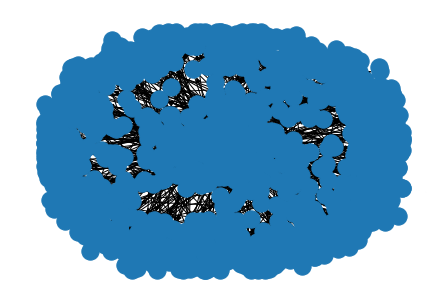

In [529]:
g__ = nx.Graph()
g__.add_edges_from(gateEdges)
print(len(gateEdges))
allDiffusionTime = []
mcaps=[tot_g[i] for i in random.sample(range(0, 500), 20)]
toTakeArgmax=[]
for node in gateNodesList:
#     print(node)
    bfs_tree = nx.bfs_tree(g__, source = node)
    nx.draw(bfs_tree)
    vecOfArgmax=[]
    for mcap in mcaps:
        model = ep.SIModel(bfs_tree)
        # Model Configuration
        cfg = mc.Configuration()
        cfg.add_model_parameter('beta', 0.03)
        cfg.add_model_parameter("fraction_infected", 0.07)
        model.set_initial_status(cfg)

        # Simulation execution
        iterations = model.iteration_bunch(200)

        #Mapping diffusion_time_to_each_node
        
        time_of_diffusion={}
        for i in range(1,node+1):
            time_of_diffusion[i]=-1
        for i in iterations:
            for j in i['status']:
                if(i['status'][j]==1):
                    time_of_diffusion[j]=i['iteration']
        allDiffusionTime.append(time_of_diffusion)
        
        for node in gateNodesList:
            if node not in time_of_diffusion.keys(): 
                time_of_diffusion[node]=-1
        
#         print("WWWW ",time_of_diffusion[17])
        
#         print("--->> ",sensor_nodes)
#         print("***** ")
#         for s in sensor_nodes:
#             print(time_of_diffusion[s])
#         print("***** ")
        
        min_v=min([time_of_diffusion[i] for i in sensor_nodes])
        min_n=-1
        for i in sensor_nodes:
            if(time_of_diffusion[i]==min_v):
                min_n=i
                break
        mu=[abs(time_of_diffusion[i]+min_v)/2 for i in sensor_nodes if(i!=min_n)]
#         print(len(delta_t),len(mu))
        
        arrivals=[]
        
        for sensor in sensor_nodes:
            if(time_of_diffusion[sensor]==-1):
                arrivals.append(200)
            else:
                arrivals.append(time_of_diffusion[sensor])
                
#         print("arrivals",arrivals)
                
        new_delta_ts = []
            
        for i in range(0,len(arrivals)):
            new_delta_t=[]
            for j in range(0,len(arrivals)):
                if(i!=j):
                    new_delta_t.append(abs(arrivals[j]-arrivals[i]))
            new_delta_ts.append(new_delta_t)
#             print("new_delta_ts",new_delta_ts)
#         print(new_delta_ts)
            
        lambd = []
        for i in range(0,len(new_delta_ts)-1):
#             print("---> ",len(new_delta_ts[i]),len(new_delta_ts[i+1]))
            val = np.correlate(new_delta_ts[i],new_delta_ts[i+1],"same")
            for i in range(0,len(val)):
                if (val[i]==0):
                    val[i]=1
            lambd.append(val)
#         print("lambd",lambd)
#         print("delta_t",delta_t,"mu",mu)    
        sub = np.subtract(delta_t,mu)
#         print("sub",sub)
        lambd[0][1]=0
        powerOfe = np.dot(np.dot((sub), np.linalg.inv(lambd) ),np.transpose(sub))
#         print("powerOfe",powerOfe)
        powerOfe=abs(powerOfe)
        fun = (1/np.linalg.det(lambd))*np.exp(-(1/2)*powerOfe)
        vecOfArgmax.append(fun)
    toTakeArgmax.append(vecOfArgmax)
print(toTakeArgmax)
#     print(node)
# nx.draw(nx.bfs_tree(g, source = 5))
#     print(time_of_diffusion)

In [530]:
print(allDiffusionTime)

[{1: -1, 2: -1, 3: -1, 4: -1, 5: -1, 6: -1, 7: -1, 8: -1, 9: -1, 10: -1, 11: -1, 12: -1, 13: -1, 14: -1, 43: 0, 45: 0, 23: 21, 0: -1, 15: -1, 19: -1, 20: -1, 18: -1, 24: -1, 27: -1, 28: -1, 29: -1, 33: -1, 21: -1, 36: -1, 37: -1, 39: -1, 40: -1, 44: -1, 47: -1, 50: -1, 42: -1, 51: -1, 52: -1, 54: -1, 59: -1, 61: -1}, {1: -1, 2: -1, 3: -1, 4: -1, 5: -1, 6: -1, 7: -1, 8: -1, 9: -1, 10: -1, 11: -1, 12: -1, 13: -1, 14: -1, 15: -1, 16: -1, 17: -1, 18: 15, 19: -1, 20: -1, 21: -1, 22: -1, 23: 117, 24: 0, 25: -1, 26: -1, 27: -1, 28: -1, 29: -1, 30: -1, 31: -1, 32: -1, 33: -1, 34: -1, 35: -1, 36: -1, 37: -1, 38: -1, 39: -1, 40: -1, 41: -1, 42: -1, 43: 0, 44: -1, 45: 53, 46: -1, 47: -1, 48: -1, 49: -1, 50: -1, 51: 3, 52: -1, 53: -1, 54: -1, 55: -1, 56: -1, 57: -1, 58: -1, 59: -1, 60: -1, 61: -1, 0: -1}, {1: -1, 2: 32, 3: -1, 4: -1, 5: -1, 6: -1, 7: -1, 8: -1, 9: -1, 10: 8, 11: -1, 12: -1, 13: -1, 14: -1, 15: 48, 16: -1, 17: -1, 18: -1, 19: -1, 20: -1, 21: -1, 22: -1, 23: -1, 24: -1, 25: -1, 26: 

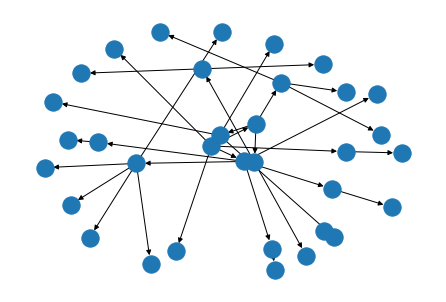

In [531]:
nx.draw(nx.bfs_tree(g, source = 1))

In [532]:
print(len(toTakeArgmax[0]),len(toTakeArgmax))

20 34


In [533]:
finArg = np.argmax(toTakeArgmax,axis=1)

In [534]:
id=-1
mx=-1
for i in range(0,len(finArg)):
    if(toTakeArgmax[i][finArg[i]]>mx):
        mx=toTakeArgmax[i][finArg[i]]
        id=i
clusterNode=gateNodesList[id]

In [535]:
print(clusterNode)

8


In [536]:
partition[clusterNode]
color=partition[clusterNode]
print(partition[clusterNode])

0


In [553]:
print(partition[18])

0


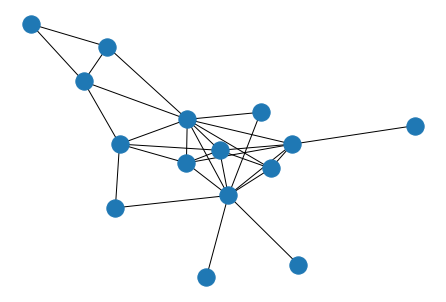

In [538]:
candidateCluster=[]
for e in G.edges():
    if(partition[e[0]]==color and partition[e[1]]==color):
        candidateCluster.append(e)
candidateGraph = nx.Graph()
candidateGraph.add_edges_from(candidateCluster)
nx.draw(candidateGraph)

In [539]:
myset=set([])
for e in candidateCluster:
    myset.add(e[0])
    myset.add(e[1])
print(myset)
my=[]
for ele in myset:
    my.append(ele)
print("list",my)


{3, 35, 4, 8, 11, 45, 15, 18, 51, 23, 21, 55, 24, 59, 29}
list [3, 35, 4, 8, 11, 45, 15, 18, 51, 23, 21, 55, 24, 59, 29]


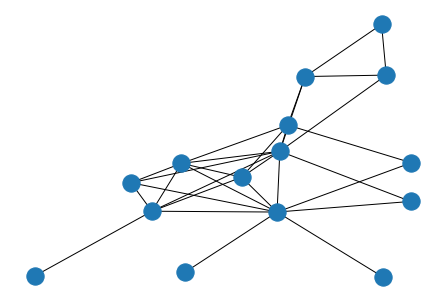

In [540]:
cG = G.subgraph(my)
nx.draw(cG)

500


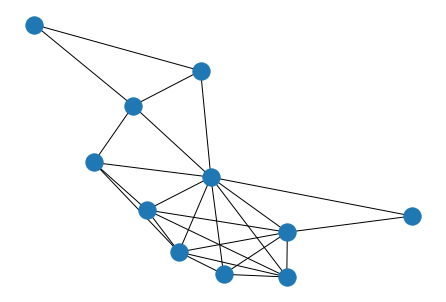

In [541]:
tot_cg_set=set([])
for i in range(0,500):
    tot_cg_set.add(tot_g[i].subgraph(my))
print(len(tot_cg_set))
tot_cg=[]
for g in tot_cg_set:
    tot_cg.append(g)
# print(len(tot_cg))
nx.draw(tot_g[7].subgraph(my))

In [542]:
print(len(cG.edges()))
nodes_in_cg=[]
nodes_in_cg_set=set([])
for ee in cG.edges():
    nodes_in_cg_set.add(ee[0])
    nodes_in_cg_set.add(ee[1])
for ele in nodes_in_cg_set:
    nodes_in_cg.append(ele)
print("nodes_in_cg",nodes_in_cg)
BCS_value_cg=BCS(tot_cg,len(tot_cg)+2)
BCS_value_cg=(sorted(BCS_value_cg.items(), key=lambda x: x[1],reverse=True))
print(BCS_value_cg)

30
nodes_in_cg [3, 35, 4, 8, 11, 45, 15, 18, 51, 21, 55, 23, 24, 59, 29]
[(45, 0.9666666666666704), (29, 0.46666666666666934), (8, 0.2666666666666653), (18, 0.14999999999999872), (24, 0.14999999999999872), (3, 0.13888888888888878), (15, 0.02222222222222212), (14, 0), (0, 0), (19, 0), (1, 0), (20, 0), (27, 0), (7, 0), (28, 0), (10, 0), (33, 0), (21, 0.0), (36, 0), (23, 0.0), (37, 0), (39, 0), (40, 0), (43, 0), (44, 0), (2, 0), (47, 0), (50, 0), (42, 0), (51, 0.0), (52, 0), (54, 0), (59, 0.0), (61, 0)]


In [543]:
# Model selection - diffusion time
model = ep.SIModel(cG)

# Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.03)
cfg.add_model_parameter("fraction_infected", 1/max([max(x[0],x[1]) for x in cG.edges()]))
model.set_initial_status(cfg)

# Simulation execution
iterations = model.iteration_bunch(200)

#Mapping diffusion_time_to_each_node
time_of_diffusion_cg={}
for i in range(1,node+1):
    time_of_diffusion_cg[i]=-1
for i in iterations:
    for j in i['status']:
        if(i['status'][j]==1):
            time_of_diffusion_cg[j]=i['iteration']

100%|██████████| 200/200 [00:00<00:00, 2020.32it/s]


In [544]:
print(time_of_diffusion_cg)

{1: -1, 2: -1, 3: 45, 4: 116, 5: -1, 6: -1, 7: -1, 8: 71, 9: -1, 10: -1, 11: 97, 12: -1, 13: -1, 14: -1, 15: 25, 16: -1, 17: -1, 18: 0, 19: -1, 20: -1, 21: 51, 22: -1, 23: 81, 24: 63, 25: -1, 26: -1, 27: -1, 28: -1, 29: 50, 30: -1, 31: -1, 32: -1, 33: -1, 34: -1, 35: 56, 36: -1, 37: -1, 38: -1, 39: -1, 40: -1, 41: -1, 42: -1, 43: -1, 44: -1, 45: 19, 46: -1, 47: -1, 48: -1, 49: -1, 50: -1, 51: 78, 52: -1, 53: -1, 54: -1, 55: 82, 56: -1, 57: -1, 58: -1, 59: 31, 60: -1, 61: -1}


In [545]:
sensor_nodes_cg=[BCS_value_cg[i][0] for i in range(0,3)]
print(sensor_nodes_cg)

[45, 29, 8]


In [546]:
delta_t_cg=[]
min_v_cg=min([time_of_diffusion_cg[i] for i in sensor_nodes_cg])
min_n_cg=-1
for i in sensor_nodes_cg:
    if(time_of_diffusion_cg[i]==min_v_cg):
        min_n_cg=i
        break
delta_t_cg=[abs(time_of_diffusion_cg[i]-min_v_cg) for i in sensor_nodes_cg if(i!=min_n_cg)]
print(delta_t_cg)

[31, 52]


100%|██████████| 200/200 [00:00<00:00, 4651.89it/s]


100%|██████████| 200/200 [00:00<00:00, 6063.32it/s]


[[5.233632458054444e-60, 3.909112268290842e-09, 7.333072079742322e-09, 5.233632458054444e-60, 5.233632458054444e-60, 6.229272727015181e-10, 6.229272727015181e-10, 5.233632458054444e-60, 5.233632458054444e-60, 4.745658654630944e-06, 5.233632458054444e-60, 5.233632458054444e-60, 5.233632458054444e-60, 5.233632458054444e-60, 6.229272727015181e-10, 4.721882338462929e-09, 6.229272727015181e-10, 5.233632458054444e-60, 5.233632458054444e-60, 5.233632458054444e-60], [5.233632458054444e-60, 2.3547144211280477e-07, 5.233632458054444e-60, 5.233632458054444e-60, 2.925059008284505e-06, 5.233632458054444e-60, 6.077275715438823e-08, 5.233632458054444e-60, 5.233632458054444e-60, 2.4775901277119963e-07, 5.233632458054444e-60, 1.510863522948583e-05, 5.233632458054444e-60, 5.233632458054444e-60, 2.6565016887051193e-07, 5.233632458054444e-60, 1.510863522948583e-05, 5.233632458054444e-60, 5.233632458054444e-60, 5.233632458054444e-60], [5.233632458054444e-60, 5.233632458054444e-60, 5.233632458054444e-60, 9.

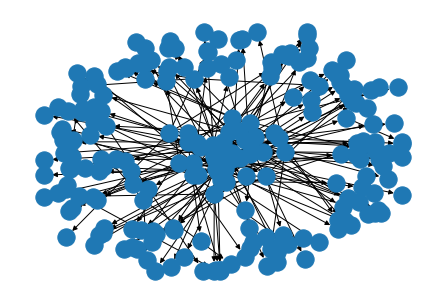

In [547]:
g___cg = nx.Graph()
g___cg.add_edges_from(cG.edges())
# allDiffusionTime = []
mcaps_cg=[tot_cg[i] for i in random.sample(range(0, 500), 20)]
toTakeArgmax_cg=[]
for node in nodes_in_cg:
#     print(node)
    bfs_tree = nx.bfs_tree(g___cg, source = node)
    nx.draw(bfs_tree)
    vecOfArgmax_cg=[]
    for mcap_cg in mcaps_cg:
        model = ep.SIModel(bfs_tree)
        # Model Configuration
        cfg = mc.Configuration()
        cfg.add_model_parameter('beta', 0.03)
        cfg.add_model_parameter("fraction_infected", 1/max([max(x[0],x[1]) for x in bfs_tree.edges()]))
        model.set_initial_status(cfg)

        # Simulation execution
        iterations = model.iteration_bunch(200)

        #Mapping diffusion_time_to_each_node
        
        time_of_diffusion_cg={}
        for i in range(1,node+1):
            time_of_diffusion_cg[i]=-1
        for i in iterations:
            for j in i['status']:
                if(i['status'][j]==1):
                    time_of_diffusion_cg[j]=i['iteration']
        
        for node in nodes_in_cg:
            if node not in time_of_diffusion_cg.keys(): 
                time_of_diffusion_cg[node]=-1
        
        min_v_cg=min([time_of_diffusion_cg[i] for i in sensor_nodes_cg])
        min_n_cg=-1
        for i in sensor_nodes_cg:
            if(time_of_diffusion_cg[i]==min_v_cg):
                min_n_cg=i
                break
        mu_cg=[abs(time_of_diffusion_cg[i]+min_v_cg)/2 for i in sensor_nodes_cg if(i!=min_n_cg)]
#         print(len(delta_t_cg),len(mu_cg))
        
        arrivals_cg=[]
        
        for sensor in sensor_nodes_cg:
            if(time_of_diffusion_cg[sensor]==-1):
                arrivals_cg.append(200)
            else:
                arrivals_cg.append(time_of_diffusion_cg[sensor])
                
#         print("arrivals_cg",arrivals_cg)
                
        new_delta_ts_cg = []
            
        for i in range(0,len(arrivals_cg)):
            new_delta_t_cg=[]
            for j in range(0,len(arrivals_cg)):
                if(i!=j):
                    new_delta_t_cg.append(abs(arrivals_cg[j]-arrivals_cg[i]))
            new_delta_ts_cg.append(new_delta_t_cg)
#             print("new_delta_ts_cg",new_delta_ts_cg)
#         print(new_delta_ts_cg)
            
        lambd_cg = []
        for i in range(0,len(new_delta_ts_cg)-1):
#             print("---> ",len(new_delta_ts_cg[i]),len(new_delta_ts_cg[i+1]))
            val_cg = np.correlate(new_delta_ts_cg[i],new_delta_ts_cg[i+1],"same")
            for i in range(0,len(val_cg)):
                if (val_cg[i]==0):
                    val_cg[i]=1
            lambd_cg.append(val_cg)
#         print("lambd_cg",lambd_cg)
#         print("delta_t_cg",delta_t_cg,"mu_cg",mu_cg)    
        sub_cg = np.subtract(delta_t,mu_cg)
#         print("sub_cg",sub_cg)
        lambd_cg[0][1]=0
        powerOfe_cg = np.dot(np.dot((sub_cg), np.linalg.inv(lambd_cg) ),np.transpose(sub_cg))
#         print("powerOfe_cg",powerOfe_cg)
        powerOfe_cg=abs(powerOfe_cg)
        fun_cg = (1/np.linalg.det(lambd_cg))*np.exp(-(1/2)*powerOfe_cg)
        vecOfArgmax_cg.append(fun_cg)
    toTakeArgmax_cg.append(vecOfArgmax_cg)
print(toTakeArgmax_cg)
#     print(node)
# nx.draw(nx.bfs_tree(g, source = 5))
#     print(time_of_diffusion)

In [548]:
print(len(toTakeArgmax_cg[0]),len(toTakeArgmax_cg))

20 15


In [549]:
finArg_cg = np.argmax(toTakeArgmax_cg,axis=1)

In [550]:
id_cg=-1
mx_cg=-1
for i in range(0,len(finArg_cg)):
    if(toTakeArgmax_cg[i][finArg_cg[i]]>mx):
        mx_cg=toTakeArgmax_cg[i][finArg_cg[i]]
        id_cg=i
source_node=nodes_in_cg[id_cg]
print(source_node)

45


In [552]:
print(partition[source_node])
print(partition[18])

0
0
